In [2]:
import pandas as pd
import pickle
# import numpy as np # linear algebra
# # import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Earnings calls reports: 
This is obtained from Financial Modeling Prep API, and has an initial presentation by the CEO(manager), followed by questions by the analyst.

In [3]:
ec10=pickle.load(open("../data/Sentiment_Market_Pharma/earnings_call_top10_ph.pickle", "rb"))
ec10=ec10.reset_index()

In [4]:
ec10

,index,symbol,quarter,year,date,content
0,0,PFE,4,2007,2008-01-24,"Operator: Amal Naj, Head of Development. Pleas..."
1,0,PFE,3,2007,2007-10-18,"Operator: Mr. Amal Naj, Senior VicePresident o..."
2,0,PFE,2,2007,2007-07-18,"Operator: Amal Naj, Head of Investor Relations..."
3,0,PFE,4,2008,2009-01-28,Operator: Good morning ladies and gentlemen an...
4,0,PFE,1,2008,2008-04-17,"Operator: Now we have Amal Naj, Head of Invest..."
...,...,...,...,...,...,...
510,0,MRK,4,2020,2021-02-04,"Operator: Good morning. My name is Lara, and I..."
511,0,MRK,1,2021,2021-04-29,"Operator: Good morning. My name is Lara, and I..."
512,0,MRK,2,2021,2021-07-29,Operator: Good morning. My name is Mary Serran...
513,0,MRK,3,2021,2021-10-28,Operator: Good morning. My name is Grace Lakra...


In [5]:
ec10.symbol.value_counts()#.sort_index()

MRK     62
PFE     59
BMY     59
JNJ     59
LLY     58
NVS     51
AZN     48
NVO     42
ROG     41
ABBV    36
Name: symbol, dtype: int64

Looking at earnings calls date statistics.

In [6]:
def max_min(x):
    return x.max() - x.min()

max_min.__name__ = 'Max minus Min'

In [7]:
ec10.groupby('symbol').agg({'date':['max','min'],'year':max_min})#,ec10.groupby('symbol')['date'].min()

date                      year
               max         min Max minus Min
symbol                                      
ABBV    2022-02-02  2013-04-26             8
AZN     2022-02-10  2005-11-09            16
BMY     2022-02-04  2007-07-26            14
JNJ     2022-01-25  2007-07-17            14
LLY     2022-02-03  2007-07-25            14
MRK     2022-02-03  2006-10-20            15
NVO     2022-02-02  2010-02-02            12
NVS     2022-02-02  2007-07-17            14
PFE     2022-02-08  2007-07-18            14
ROG     2021-07-31  2008-02-21            14

In [8]:
#checking out ways to separate the manager and analyst sections of the conference. Needs work
import re
re.split(r'(?:Operator:[ ]*)',ec10.content[1])

['',
 "Mr. Amal Naj, Senior VicePresident of Investor Development, you may begin your conference.\nAmal Naj: Good afternoon, and thank you forjoining our Third Quarter 2007 Analyst Conference Call. I am here with JeffKindler, Chairman and CEO; David Shedlarz, Vice Chairman; Frank D'Amelio, ChiefFinancial Officer and other members of our senior management team. We will first review the resultsof the latest quarter presented in the earnings release issued this morning andavailable on our website. In a change of practice, we will present financialcharts on the call, which can be viewed on our home page at www.pfizer.com. Inthe investor presentations tab by clicking on the link, quarterly corporateperformance third quarter 2007. We'll take questions after thereview of our results. In order to facilitate the maximum number of questions,we would appreciate if you would limit yourself to just one question per personand try submitting, we will come back to you for any follow-up questions youmi

In [9]:
print(ec10.content[1])

Operator: Mr. Amal Naj, Senior VicePresident of Investor Development, you may begin your conference.
Amal Naj: Good afternoon, and thank you forjoining our Third Quarter 2007 Analyst Conference Call. I am here with JeffKindler, Chairman and CEO; David Shedlarz, Vice Chairman; Frank D'Amelio, ChiefFinancial Officer and other members of our senior management team. We will first review the resultsof the latest quarter presented in the earnings release issued this morning andavailable on our website. In a change of practice, we will present financialcharts on the call, which can be viewed on our home page at www.pfizer.com. Inthe investor presentations tab by clicking on the link, quarterly corporateperformance third quarter 2007. We'll take questions after thereview of our results. In order to facilitate the maximum number of questions,we would appreciate if you would limit yourself to just one question per personand try submitting, we will come back to you for any follow-up questions you

# Daily Stock Price Data: 
Obtained from Financial Modeling Prep API

numberOfShares is the volume and stockPrice is the close.

In [10]:
mt10=pickle.load(open("../data/Sentiment_Market_Pharma/main_top10_ph.pickle", "rb"))
mt10.head(5)

,ticker,date,close,volume
1394,ABBV,2017-01-03,62.410000,9328200.0
1393,ABBV,2017-01-04,63.290001,8674800.0
1392,ABBV,2017-01-05,63.770001,5359400.0
1391,ABBV,2017-01-06,63.790001,4722300.0
1390,ABBV,2017-01-09,64.209999,8794500.0


In [11]:
mt10.ticker.value_counts()

ABBV    1395
AZN     1395
BMY     1395
JNJ     1395
LLY     1395
MRK     1395
NVO     1395
NVS     1395
PFE     1395
ROG     1395
Name: ticker, dtype: int64

This looks pretty balanced, we have equal amounts of data for the companies listed. Let's take a look at the timelines of the stock data we have to check if this matches up with the data of the earnings calls and the press release data.

In [12]:
mt10.count()

ticker    13950
date      13950
close     13950
volume    13950
dtype: int64

In [13]:
mt10.groupby('ticker').agg({'date':['min','max']})

date           
              min        max
ticker                      
ABBV   2017-01-03 2022-07-19
AZN    2017-01-03 2022-07-19
BMY    2017-01-03 2022-07-19
JNJ    2017-01-03 2022-07-19
LLY    2017-01-03 2022-07-19
MRK    2017-01-03 2022-07-19
NVO    2017-01-03 2022-07-19
NVS    2017-01-03 2022-07-19
PFE    2017-01-03 2022-07-19
ROG    2017-01-03 2022-07-19

In [14]:
mt10.describe()

,close,volume
count,13950.000000,1.395000e+04
mean,89.934618,7.842981e+06
std,51.654806,9.698224e+06
min,26.719999,2.055400e+04
25%,52.485000,1.992975e+06
50%,75.676525,5.197348e+06
75%,115.457500,9.783250e+06
max,331.600000,2.301539e+08


<Axes: xlabel='close', ylabel='Density'>

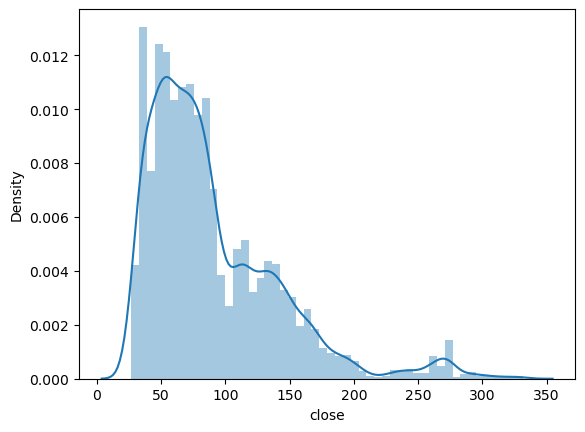

In [15]:
sns.distplot(mt10.close)

On analysing the volume of stocks sold, we can see that is this extremely right-skewed. Need to take a look at quartile ranges for this data.

<Axes: xlabel='volume', ylabel='Density'>

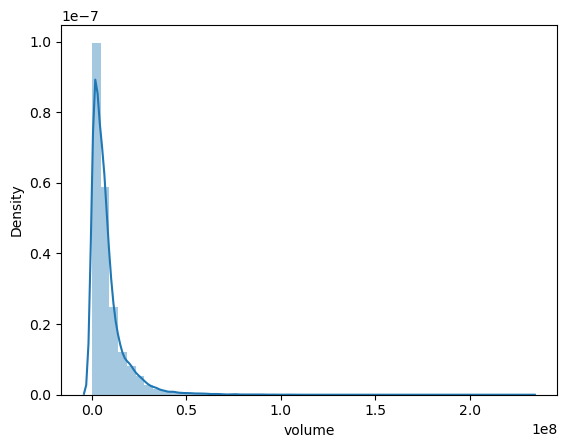

In [16]:
sns.distplot(mt10.volume)

# DAILY MARKET SENTIMENT

Daily market sentiment: This is obtained from StockNews API, and seems to be just sentiments aggregated from news topics at a particular date, and not actual metrics computed from volatility metrics like the CBOE Volatility Index (VIX) or the High-Low Index or BPI. This is just an inference based on the fact that the StockNews API gives news articles, and just has a sentiment indicator that is categorical. This will need to be confirmed by Eric.

In [17]:
dailyms=pickle.load(open("../data/Sentiment_Market_Pharma/daily_market_sentiment.pickle", "rb"))

dailyms=dailyms.reset_index()

In [18]:
dailyms.date.max(),dailyms.date.min()

('2022-04-15', '2018-02-26')

In [19]:
dailyms.describe()

,index,Negative,Neutral,Positive
count,1146.000000,1146.000000,1146.000000,1146.000000
mean,24.105585,27.645724,30.815881,24.957243
std,14.226497,25.567142,21.055472,18.873676
min,0.000000,0.000000,0.000000,0.000000
25%,12.000000,6.000000,11.000000,6.000000
50%,24.000000,24.000000,32.000000,24.000000
75%,36.000000,40.000000,46.000000,38.000000
max,49.000000,229.000000,106.000000,114.000000


# Press Release: 
Obtained from Financial Modeling Prep API

In [20]:
press=pickle.load(open("../data/Sentiment_Market_Pharma/press_release_top10_ph.pickle", "r+b"))
press=pd.DataFrame(press).reset_index()

In [21]:
print(press.title[4])

PFIZER AND BIONTECH RECEIVE EXPANDED U.S. EMERGENCY USE AUTHORIZATION FOR AN ADDITIONAL COVID-19 VACCINE BOOSTER IN INDIVIDUALS AGED 50 YEARS AND OLDER


In [22]:
press.date.max(),press.date.min()

('2022-04-14', '2019-09-25')

In [23]:
press.count()

index     1808
symbol    1808
date      1808
title     1808
text      1808
dtype: int64

In [24]:
press.groupby('symbol').agg({'date':['min','max']})

date            
               min         max
symbol                        
ABBV    2019-09-25  2022-04-14
AZN     2020-11-19  2022-04-06
BMY     2019-09-27  2022-04-11
JNJ     2019-09-25  2022-04-07
LLY     2019-09-28  2022-04-11
MRK     2019-09-27  2022-04-14
NVO     2020-10-30  2022-04-11
NVS     2020-10-30  2022-04-05
PFE     2019-09-25  2022-04-11
ROG     2019-10-17  2022-01-25

In [25]:
press.symbol.value_counts()

MRK     281
PFE     274
LLY     265
BMY     226
ABBV    211
JNJ     189
AZN     170
NVO     103
NVS      67
ROG      22
Name: symbol, dtype: int64

### Merging the different datasets to get observations for which we have all the data.

In [26]:
ec10.drop(['index'],axis=1,inplace=True)

In [27]:
# ec10.date.dtype
mt10.date.dtype

dtype('<M8[ns]')

In [28]:
#datetime conversion
ec10['date']=pd.to_datetime(ec10['date'])

In [38]:
#merge the ec10 and the mt10 dataframes
ec10mt10=pd.merge(ec10,mt10,how='outer',left_on=['symbol','date'],right_on=['ticker','date'])

In [30]:
ec10mt10.date

0       2008-01-24
1       2007-10-18
2       2007-07-18
3       2009-01-28
4       2008-04-17
           ...    
14265   2022-07-13
14266   2022-07-14
14267   2022-07-15
14268   2022-07-18
14269   2022-07-19
Name: date, Length: 14270, dtype: datetime64[ns]

In [31]:
ec10mt10.symbol.fillna(ec10mt10.ticker,inplace=True)
ec10mt10.ticker.fillna(ec10mt10.symbol,inplace=True)


,symbol,quarter,year,date,content,ticker,close,volume
0,PFE,4.0,2007.0,2008-01-24,"Operator: Amal Naj, Head of Development. Pleas...",NaN,NaN,NaN
1,PFE,3.0,2007.0,2007-10-18,"Operator: Mr. Amal Naj, Senior VicePresident o...",NaN,NaN,NaN
2,PFE,2.0,2007.0,2007-07-18,"Operator: Amal Naj, Head of Investor Relations...",NaN,NaN,NaN
3,PFE,4.0,2008.0,2009-01-28,Operator: Good morning ladies and gentlemen an...,NaN,NaN,NaN
4,PFE,1.0,2008.0,2008-04-17,"Operator: Now we have Amal Naj, Head of Invest...",NaN,NaN,NaN


In [32]:
ec10mt10=ec10mt10[ec10mt10.content.notna()]
# [ec10mt10.close.notna()]
ec10mt10[ec10mt10.close.isna()].groupby('date').count()

,symbol,quarter,year,content,ticker,close,volume
date,,,,,,,
2005-11-09,1,1,1,1,0,0,0
2006-02-06,1,1,1,1,0,0,0
2006-04-20,1,1,1,1,0,0,0
2006-07-20,1,1,1,1,0,0,0
2006-10-20,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...
2020-05-03,1,1,1,1,0,0,0
2020-08-02,1,1,1,1,0,0,0
2021-05-02,1,1,1,1,0,0,0


In [33]:
#get the window around the earnings calls
# go for regression on the window around the earnings calls
# days since last earnings call



In [57]:
ec10mt10['closeshifted']=ec10mt10.groupby('symbol').close.shift(1)

In [66]:
ec10mt10.sort_values(by=['symbol','date'],inplace=True)

In [55]:
ec10mt10.symbol.fillna(ec10mt10.ticker,inplace=True)
ec10mt10.ticker.fillna(ec10mt10.symbol,inplace=True)


In [67]:
ec10mt10

,symbol,quarter,year,date,content,ticker,close,volume,closeshifted
419,ABBV,1.0,2013.0,2013-04-26,Operator: Good morning and thank you for stand...,ABBV,NaN,NaN,NaN
420,ABBV,2.0,2013.0,2013-07-26,Operator: Good morning and thank you for stand...,ABBV,NaN,NaN,NaN
418,ABBV,3.0,2013.0,2013-10-25,Operator: Good morning and thank you for stand...,ABBV,NaN,NaN,NaN
417,ABBV,4.0,2013.0,2014-01-31,"Operator: Good morning, and thank you for stan...",ABBV,NaN,NaN,NaN
421,ABBV,1.0,2014.0,2014-04-25,Operator: Good morning and thank you for stand...,ABBV,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14265,ROG,NaN,NaN,2022-07-13,NaN,ROG,261.93,74979.0,259.00
14266,ROG,NaN,NaN,2022-07-14,NaN,ROG,263.29,90034.0,261.93
14267,ROG,NaN,NaN,2022-07-15,NaN,ROG,264.00,130208.0,263.29
14268,ROG,NaN,NaN,2022-07-18,NaN,ROG,263.53,111222.0,264.00


In [71]:
mt10[mt10['ticker']=='ABBV']

1394   2017-01-03
1393   2017-01-04
1392   2017-01-05
1391   2017-01-06
1390   2017-01-09
          ...    
4      2022-07-13
3      2022-07-14
2      2022-07-15
1      2022-07-18
0      2022-07-19
Name: date, Length: 1395, dtype: datetime64[ns]